In [3]:
%%capture
#!rm -Rf /home/peres/.cache/rootpy/*
%run "~/notebooks/power_on.ipynb"
%run "~/notebooks/function_definitions.ipynb"

cachefolder='/home/peres/minitrees/cache/UZH/ER_NR_discrimination/'

In [22]:
hax.misc.code_hider()
%run "./nov2018_functions.ipynb"

## Select proper datasets

In [7]:
%%capture
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         main_data_paths= ['/dali/lgrandi/xenon1t/processed/pax_v6.10.1/'], #'/project/lgrandi/xenon1t/processed/latest/'
         minitree_paths = ['/dali/lgrandi/xenon1t/minitrees/pax_v6.10.1/','/home/peres/minitrees'], #'/project/lgrandi/xenon1t/minitrees/latest/',
        make_minitrees = False)
print('Using hax version'+str(hax.__version__)+'\n')

hax.minitrees.TreeMaker.mc_data = False
#import logging
#logging.basicConfig(level=logging.INFO)
#import warnings
#warnings.simplefilter('ignore')


datasets = hax.runs.datasets

bad_tags = ['bad','bad,waterfilling','waterfilling, bad','flash','messy','noise','afterpulse','hiccup','Flash','Hiccup']

dataset_select = datasets[((datasets['source__type']==('neutron_generator') )| 
                                (datasets['source__type']==('rn220')) |
                                (datasets['source__type']==('Rn220')))
                         ]

print(len(datasets),'-> Select Neutron Generator runs->',len(dataset_select),'(%.6f%%)'%(len(dataset_select)/len(datasets)*100))

dataset_select['duration'] = dataset_select['end'].sub(dataset_select['start'])

b = len(dataset_select)

dataset_select = dataset_select[dataset_select['duration'] > '00:50:00']
print(b,'-> Get only ~1h runs ->',len(dataset_select),'(%.2f%%)'%(len(dataset_select)/b*100))

print('We got a total of %.3f days of NG+Rn220 data to play with! (in this PAX version (?))' %(np.sum(dataset_select['duration'])/np.timedelta64(1, 'D')))
b = len(dataset_select)
dataset_select = dataset_select[(dataset_select['end'] > pd.to_datetime('20181001', format='%Y%m%d', errors='ignore'))&
                                            (dataset_select['end'] < pd.to_datetime('20181031', format='%Y%m%d', errors='ignore'))
                                            ]
#dataset_select_2018 = dataset_select_2018[dataset_select['end'] < pd.to_datetime('20180326', format='%Y%m%d', errors='ignore')]
print('Total NG+Rn220 datasets: %d\nDatasets from Oct2018: %d (%.6f%%) - making %.2f days of data.'%(b,len(dataset_select),len(dataset_select)/b*100,np.sum(dataset_select['duration'])/np.timedelta64(1, 'D')))
runNG_start = 22820
runNG_end = 22864
runRn_start = 22880
runRn_end = 22997


bad_runnbr = [22823,22832,22843,22844,22845,22849,22851,22853,22854,22855,22863,22836,22839, #NG datasets (13)
              22888,22897,22906,22909,22911,22912,22913,22914,22943,22944,22945,22951,23020,] #Rn220 datasets (13)
#bad_runnbr = [17543,17960,17928,17890,17897,17901,17902,17871]


dataset_NG = dataset_select[ (dataset_select['number'] >= runNG_start) &
                                  (dataset_select['number'] <= runNG_end) & 
                                   (~dataset_select['number'].isin(bad_runnbr))]
dataset_Rn = dataset_select[ (dataset_select['number'] >= runRn_start) &
                                  (dataset_select['number'] <= runRn_end)& 
                                   (~dataset_select['number'].isin(bad_runnbr))]


print('Run NG: %.2f days of data; %d datasets; %d events triggered; %.2f events/s.' %(np.sum(dataset_NG['duration'])/np.timedelta64(1, 'D'),
                                                                            len(dataset_NG),
                                                                   np.sum(dataset_NG['trigger__events_built']),
                                                                    np.sum(dataset_NG['trigger__events_built'])/
                                                               (np.sum(dataset_NG['duration'])/np.timedelta64(1, 's'))))
print('Run Rn: %.2f days of data; %d datasets; %d events triggered; %.2f events/s.' %(np.sum(dataset_Rn['duration'])/np.timedelta64(1, 'D'),
                                                                            len(dataset_Rn),
                                                                   np.sum(dataset_Rn['trigger__events_built']),
                                                                    np.sum(dataset_Rn['trigger__events_built'])/
                                                               (np.sum(dataset_Rn['duration'])/np.timedelta64(1, 's'))))

Runs = {'NG':[dataset_NG], 'Rn':[dataset_Rn]} #This is the main dictionary where everything will be stored!
del dataset_NG, dataset_Rn

In [20]:
dataset_NG = Runs['NG'][0]
dataset_Rn = Runs['Rn'][0]
print('Run NG: %.2f days of data; %d datasets; %d events triggered; %.2f events/s.' %(np.sum(dataset_NG['duration'])/np.timedelta64(1, 'D'),
                                                                            len(dataset_NG),
                                                                   np.sum(dataset_NG['trigger__events_built']),
                                                                    np.sum(dataset_NG['trigger__events_built'])/
                                                               (np.sum(dataset_NG['duration'])/np.timedelta64(1, 's'))))
print('Run Rn: %.2f days of data; %d datasets; %d events triggered; %.2f events/s.' %(np.sum(dataset_Rn['duration'])/np.timedelta64(1, 'D'),
                                                                            len(dataset_Rn),
                                                                   np.sum(dataset_Rn['trigger__events_built']),
                                                                    np.sum(dataset_Rn['trigger__events_built'])/
                                                               (np.sum(dataset_Rn['duration'])/np.timedelta64(1, 's'))))

Run NG: 1.29 days of data; 31 datasets; 2358070 events triggered; 21.11 events/s.
Run Rn: 3.17 days of data; 76 datasets; 8848859 events triggered; 32.31 events/s.


### Load NG and Rn220 datasets from hax

In [13]:
#### Load files on midway (dali)

#%capture
Runs = process_runs(Runs, savenumber = 5, trees='all')

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


cs1 < 200 selection: 100467 rows removed (0.06% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
0 / 76


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:58: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = new_history


cs1 < 200 selection: 142534 rows removed (0.05% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
cs1 < 200 selection: 160598 rows removed (0.05% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
cs1 < 200 selection: 172722 rows removed (0.08% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
cs1 < 200 selection: 185506 rows removed (0.07% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
cs1 < 200 selection: 196308 rows removed (0.08% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
cs1 < 200 selection: 66695 rows removed (2.77% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
cs1 < 200 selection: 62151 rows removed (2.83% passed

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


cs1 < 200 selection: 66745 rows removed (5.88% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
0 / 31
cs1 < 200 selection: 67980 rows removed (6.05% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
cs1 < 200 selection: 68432 rows removed (6.10% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
cs1 < 200 selection: 67541 rows removed (5.92% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
cs1 < 200 selection: 67666 rows removed (6.20% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
cs1 < 200 selection: 70931 rows removed (6.26% passed)
cs1 > 0 selection: 0 rows removed (100.00% passed)
cs2 > 0 selection: 0 rows removed (100.00% passed)
cs1 < 200 selection: 71862 rows removed (7.05% pass

In [14]:
print('NG: %d events loaded.' %(len(Runs['NG'][1])))
print('Rn: %d events loaded.' %(len(Runs['Rn'][1])))

NG: 147427 events loaded.
Rn: 113779 events loaded.


In [15]:
ng = Runs['NG'][1]
rn = Runs['Rn'][1]

## Corrections

In [16]:
rn.columns.values

array(['alt_s1_interaction_drift_time', 'alt_s1_interaction_z',
       'alt_s2_interaction_s2_range_50p_area',
       'alt_s2_interaction_s2_range_80p_area', 'alt_s2_interaction_x',
       'alt_s2_interaction_y', 'alt_s2_interaction_z',
       'area_before_main_s2', 'cs1', 'cs1_a', 'cs1_a_no_field_corr',
       'cs1_b', 'cs1_b_int_b', 'cs1_b_int_b_no_field_corr',
       'cs1_b_no_field_corr', 'cs1_no_field_corr', 'cs1_tpf_2dfdc', 'cs2',
       'cs2_a', 'cs2_a_bottom', 'cs2_a_top', 'cs2_alpha', 'cs2_bottom',
       'cs2_bottom_alpha', 'cs2_top', 'cs2_top_alpha', 'drift_time',
       'ds_s1_b_n_distinct_channels', 'ds_s1_dt', 'ds_second_s2',
       'event_duration', 'event_number', 'event_time', 'flashing_PMT',
       'flashing_time', 'flashing_width', 'inside_flash',
       'int_a_drift_time', 'int_a_r_3d_nn', 'int_a_r_correction_3d_nn',
       'int_a_r_nn', 'int_a_x_3d_nn', 'int_a_x_nn', 'int_a_x_pax',
       'int_a_y_3d_nn', 'int_a_y_nn', 'int_a_y_pax', 'int_a_z_3d_nn',
       'int_a_

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:804: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


[-96.6  -86.94 -77.28 -67.62 -57.96 -48.3  -38.64 -28.98 -19.32  -9.66   0.  ]


  0%|          | 0/147427 [00:00<?, ?it/s]


IndexError: index 11 is out of bounds for axis 0 with size 11

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


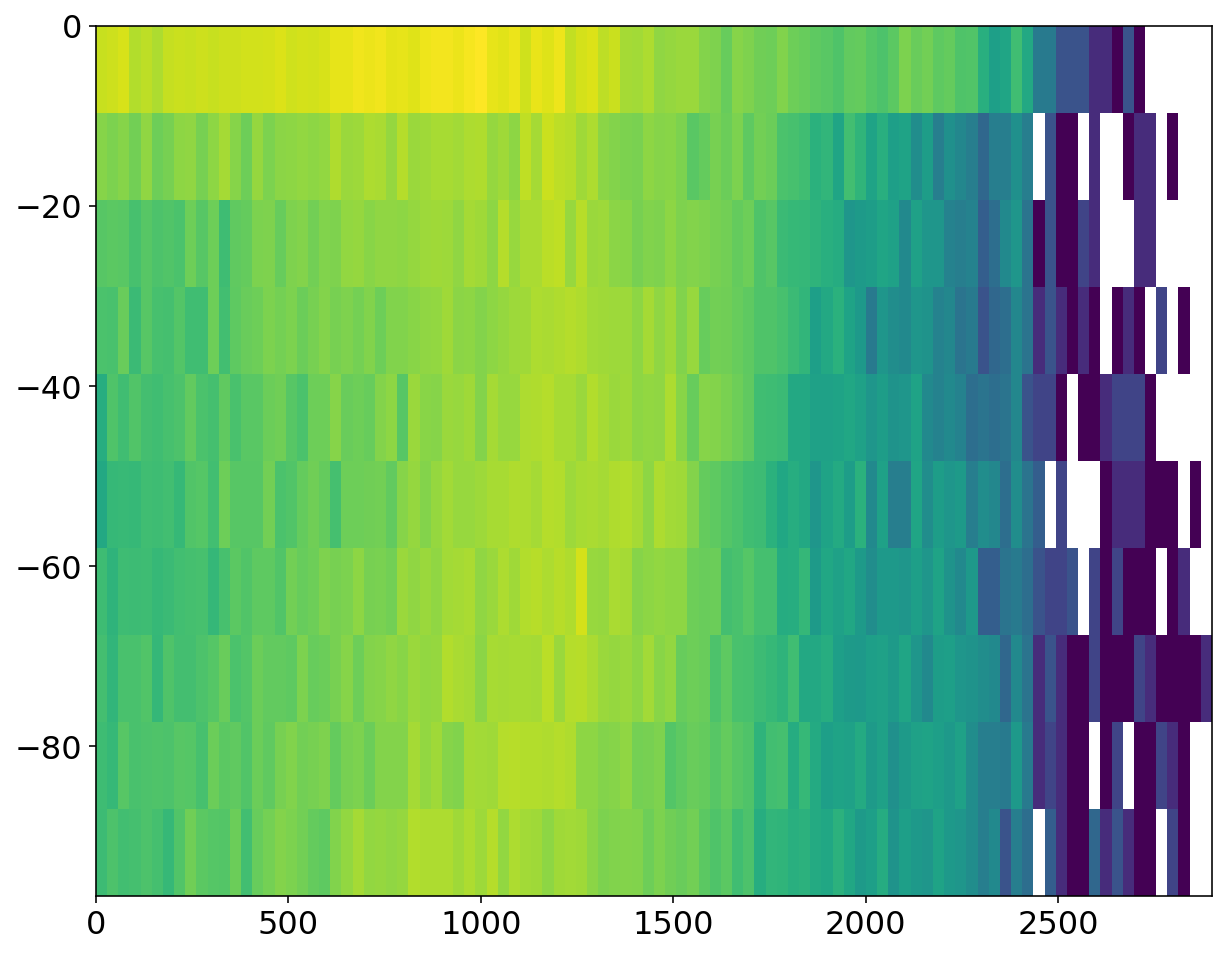

In [23]:
FielCorrection(ng,cachefolder)